# Normality of Correlations
#### by Elizabeth Barnes

What does the distribution of correlations look like? Here we take a Monte Carlo approach to test the idea that transforming correlations (when the population mean correlation is zero) to a t-statistic works!

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import seaborn as sns

#.............................................
# PLOTTING COMMANDS 
#.............................................
import matplotlib as mpl

# set figure defaults
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12.0/2, 8.0/2)

Let's first setup the easy parameter - the length of our samples. We can always change it later.

In [39]:
# sample size
N = 10

Here's the "magic". We loop through many instances and each time grab two samples of length N from a standard normal distribution (call them x and y). Then we correlate them (Pearson's r), and save the correlation.

In [40]:
r = np.empty((10000,))

print('looping through instances...')

for iloop, val in enumerate(r):
    x = np.random.normal(0.,1.,size = N)
    y = np.random.normal(0.,1.,size = N)
    
    r[iloop] = stats.pearsonr(x,y)[0]

looping through instances...


Let's look at our data, that is, the 10,000 correlations that we've collected.

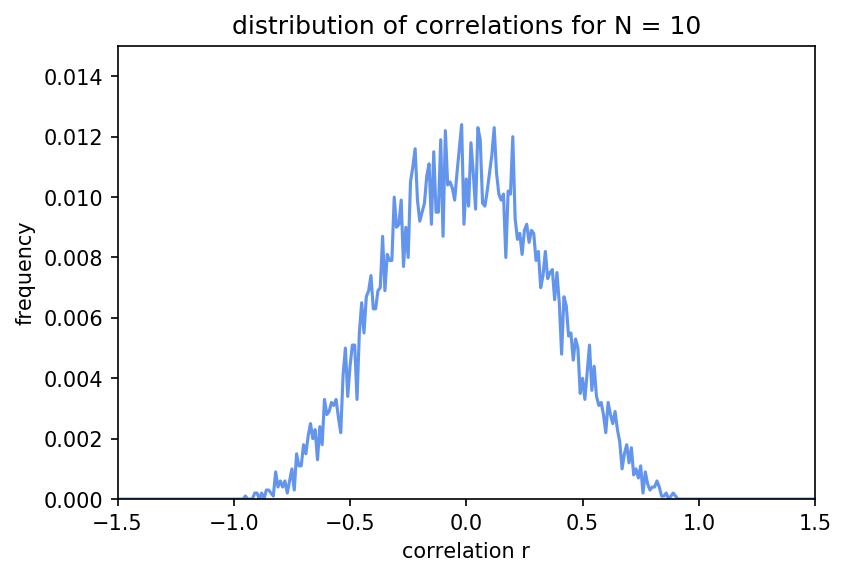

In [41]:
xinc= np.arange(-2.,2.,0.01)

plt.figure()
hx = np.histogram(r,xinc)
plot_hx = hx[0]/float(np.size(r))
plt.plot(hx[1][:-1],plot_hx,'-',color='cornflowerblue', label = 'correlations')
 
plt.xlim(-1.5,1.5)
plt.ylim(0,.015)
plt.xlabel('correlation r')
plt.ylabel('frequency')
plt.title('distribution of correlations for N = ' + str(N))
plt.show()

Notice how correlations can be anywhere between 1 and -1, but these values only lie between about $\pm 0.5$. The reason is that our x and y are really not correlated (both random), so we expect the correlations we get out to be small and centered around zero.

Let's add a standard normal to compare.

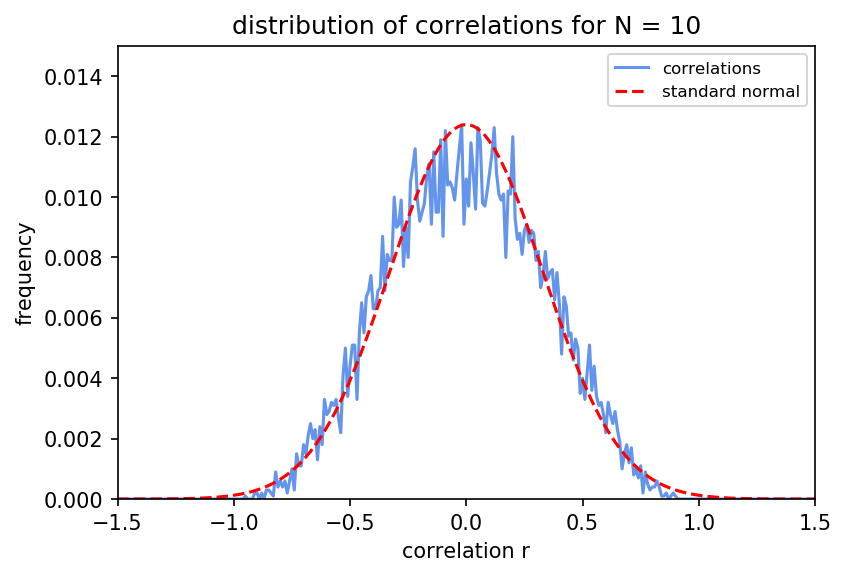

In [42]:
plt.figure()
hx = np.histogram(r,xinc)
plot_hx = hx[0]/float(np.size(r))
plt.plot(hx[1][:-1],plot_hx,'-',color='cornflowerblue', label = 'correlations')
 
plt.ylim(0,.015)
plt.xlabel('correlation r')
plt.ylabel('frequency')
plt.title('distribution of correlations for N = ' + str(N))

plt.xlim(-1.5,1.5)

f = stats.norm.pdf(xinc, loc = 0.0,scale = np.std(r))
plt.plot(xinc,(f/np.max(f))*np.max(plot_hx),'--r', label = 'standard normal')

plt.legend(fontsize = 8)

plt.show()

Now we have added a dashed red curve to represent a normal distribution with a zero mean and the same standard deviation as our correlations. While the fit looks ok - it is important to remember that the blue curve _is not normal_ since it cannot exceed -1 or 1, while the red curve can. So don't be fooled! However, we can transform our correlations to take these limitations into account...

Now, let's also transform these correlations into a t-statistic. Let's call this transformed correlation (now a t-statistic) "tr".

In [43]:
tr = (r * np.sqrt(N-2))/(np.sqrt(1-r**2))    

So - are the "tr" values actually distributed according the a t-statistic? One way to get a feel for this is to count how many tr values lie about the true t-distribution 97.5th percentile (for example). If the answer is 2.5%, then perhaps this works!

In [44]:
j = np.where(tr>=stats.t.ppf(0.975,N-2))
a = np.size(j)/float(np.size(tr))

print('--------------------------------------------------------------------------------')
print('N = ' + str(N) + ': t-distribution (theoretical) = 2.5%, Actual (data) = ' + str(round(a,3)*100.) + '%')
print('--------------------------------------------------------------------------------')

--------------------------------------------------------------------------------
N = 10: t-distribution (theoretical) = 2.5%, Actual (data) = 2.4%
--------------------------------------------------------------------------------


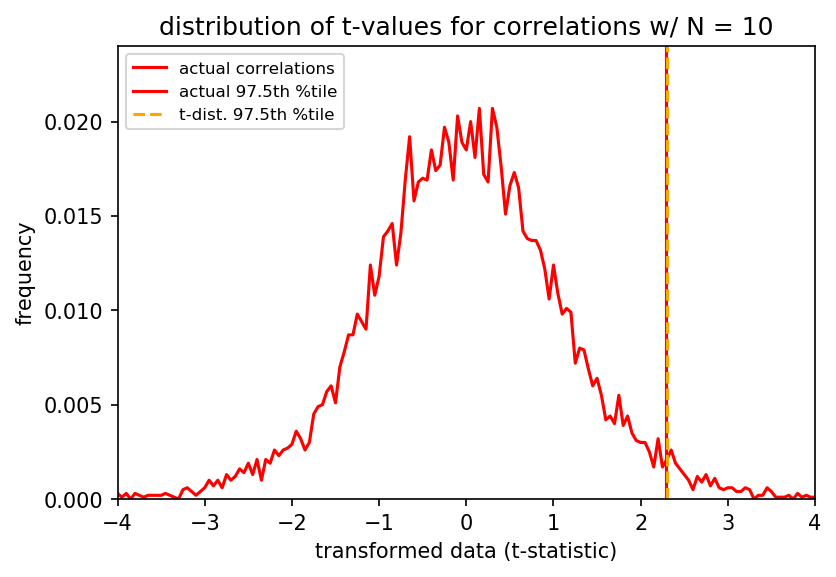

In [45]:
xinc= np.arange(-5.,5.,0.05)

plt.figure()

hx = np.histogram(tr,xinc)
plt.plot(hx[1][:-1],hx[0]/float(np.size(tr)),'-',color='red', label = 'actual correlations')

plt.axvline(x=np.percentile(tr,97.5),color='red',label = 'actual 97.5th %tile')
plt.axvline(x=stats.t.ppf(0.975,N-2),linestyle='--',color='orange',label = 't-dist. 97.5th %tile')

plt.xlabel('transformed data (t-statistic)')
plt.ylabel('frequency')

plt.xlim(-4,4)
plt.ylim(0.0,0.024)

plt.title('distribution of t-values for correlations w/ N = ' + str(N))

plt.legend(loc = 'upper left', fontsize = 8)
plt.show()

So - the transformed correlations behave just like t-distribution! Hence, we can do our statistical tests using this!

## True correlation is non-zero

In [46]:
N2 = 20
r1 = []
r1 = np.empty((100000,))

print('looping through instances...')

for iloop, val in enumerate(r1):
    x = np.random.normal(0.,1.,size = N2)
    y = x+2.0*np.random.normal(0.,1.,size = N2)
    
    r1[iloop] = stats.pearsonr(x,y)[0]  
print('done with looping')    

looping through instances...
done with looping


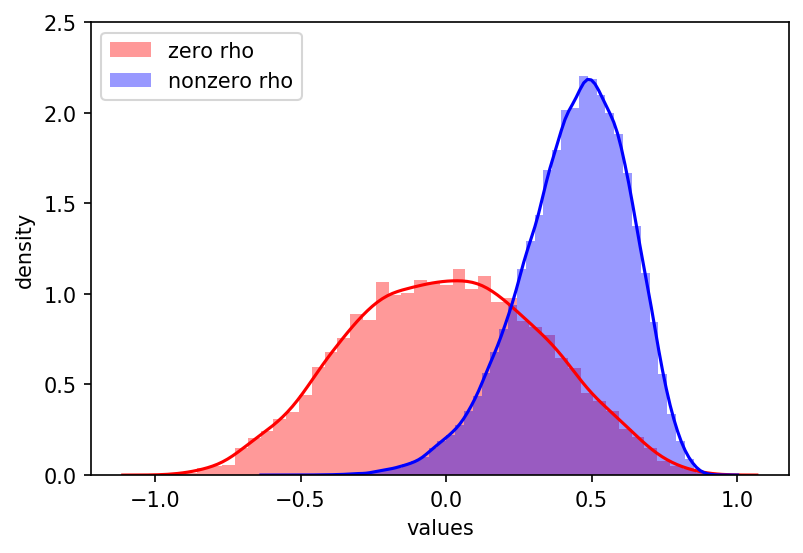

In [47]:
#plot the data!
plt.figure()
sns.distplot(r, color="r", label='zero rho')
sns.distplot(r1, color="b", label='nonzero rho')
plt.ylim(0,2.5)
plt.xlabel('values')
plt.ylabel('density')
plt.legend()
plt.show()

In [48]:
#transform the data into "t" values
tr1 = (r1 * np.sqrt(N-2))/(np.sqrt(1-r1**2))    

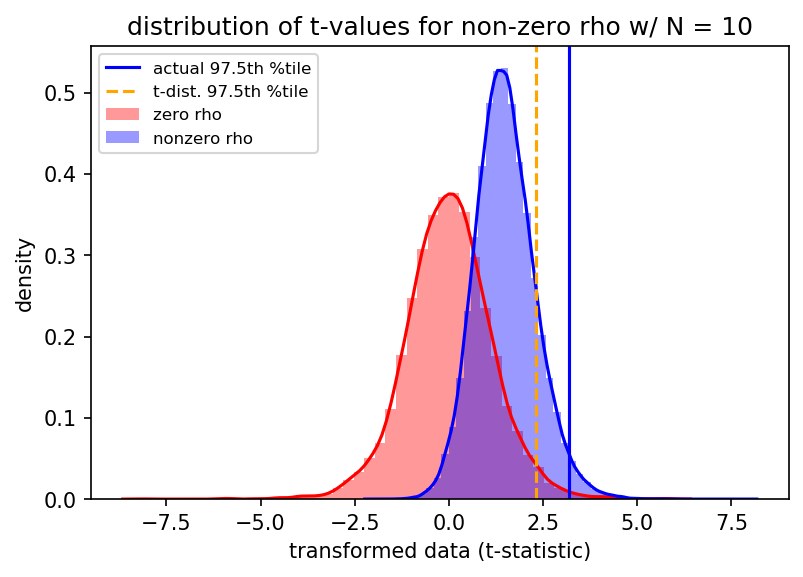

In [49]:
plt.figure()
sns.distplot(tr, color="r", label='zero rho')
sns.distplot(tr1, color="b", label='nonzero rho')

plt.axvline(x=np.percentile(tr1,97.5),color='blue',label = 'actual 97.5th %tile')
plt.axvline(x=stats.t.ppf(0.975,N-2),linestyle='--',color='orange',label = 't-dist. 97.5th %tile')

plt.xlabel('transformed data (t-statistic)')
plt.ylabel('density')

#plt.xlim(-4,4)
#plt.ylim(0.0,0.024)

plt.title('distribution of t-values for non-zero rho w/ N = ' + str(N))
plt.legend(loc = 'upper left', fontsize = 8)
plt.show()

The t-distribution does not work *at all* for the non-zero correlation data! What do we do? See below....

## Fisher-Z transformation

In [50]:
FZ = 0.5*np.log((1+r)/(1-r))
FZ1 = 0.5*np.log((1+r1)/(1-r1))

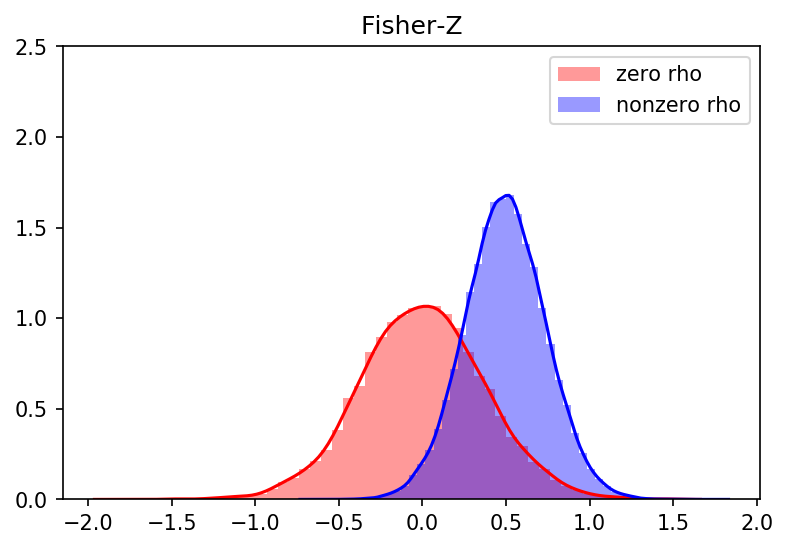

In [51]:
#plot the data!
plt.figure()
sns.distplot(FZ, color="r", label='zero rho')
sns.distplot(FZ1, color="b", label='nonzero rho')
plt.ylim(0,2.5)
plt.title('Fisher-Z')
plt.legend()
plt.show()

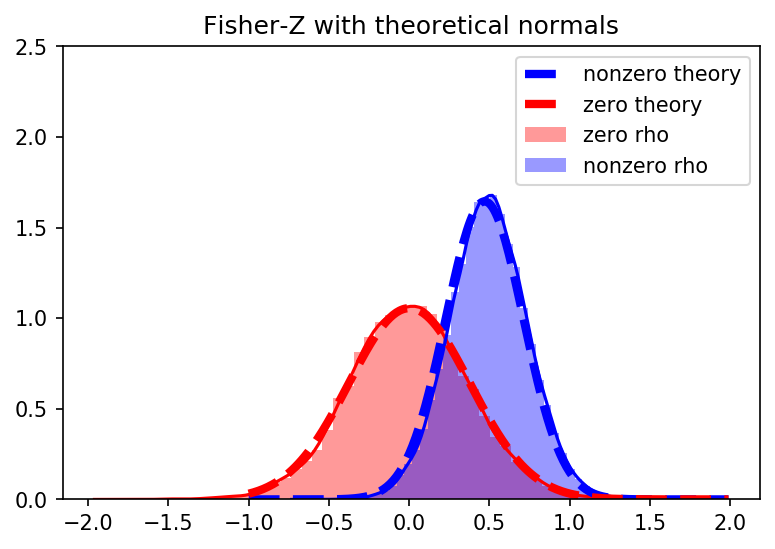

In [52]:
# theoretical distribution for zero rho
muZ = 0.5*np.log((1+np.mean(r))/(1-np.mean(r)))
sigmaZ = 1/np.sqrt(N-3)
x = np.arange(-1,2,.01)
z_norm0 = stats.norm.pdf(x,loc=muZ,scale=sigmaZ)

# theoretical distribution for zero rho
muZ = 0.5*np.log((1+np.mean(r1))/(1-np.mean(r1)))
sigmaZ = 1/np.sqrt(N2-3)
x = np.arange(-1,2,.01)
z_norm = stats.norm.pdf(x,loc=muZ,scale=sigmaZ)


#plot the data!
plt.figure()
sns.distplot(FZ, color="r", label='zero rho')
sns.distplot(FZ1, color="b", label='nonzero rho')
plt.plot(x,z_norm,label='nonzero theory', linestyle= '--', color='b', linewidth=4)
plt.plot(x,z_norm0,label='zero theory', linestyle = '--', color='r', linewidth=4)
plt.ylim(0,2.5)
plt.title('Fisher-Z with theoretical normals')
plt.legend()
plt.show()
